In [3]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
#from sklearn.base import BaseEstimator, ClassifierMixin
#from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV

import  textblob
import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
pd.set_option('display.max_rows', 10000)
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# IMPORT DATA

In [5]:
women_clothing=pd.read_excel(r'C:\Users\Deepika\Downloads\ML\women clothing.xlsx')

# a.PERFORMING EXPLORATORY ANALYSIS ON THE DATA TO UNDERSTAND THE PATTERNS

In [6]:
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
women_clothing.tail()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1
23485,1104,General Petite,Dresses,Dresses,Chennai,Mobile,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1


In [8]:
women_clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [9]:
women_clothing.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [10]:
women_clothing.value_counts('Recommend Flag')

Recommend Flag
1    19314
0     4172
dtype: int64

In [11]:
percentage_1s= (19314)*100/(19314+4172)
print('Percentge of 1s is :', percentage_1s)
percentage_0s= (4172)*100/(19314+4172)
print('Percentge of 0s is :', percentage_0s)

Percentge of 1s is : 82.23622583666865
Percentge of 0s is : 17.763774163331345


In [12]:
women_clothing.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [13]:
women_clothing.columns=['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag']

In [14]:
women_clothing.shape

(23486, 11)

In [15]:
df =women_clothing.iloc[:,:9]

In [16]:
df.drop(['Review_Title', 'Product_ID'], axis=1 , inplace = True)

In [18]:
df.head()

,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl..."
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...


# MISSING VALUE TREATMENT

In [19]:
women_clothing.dropna(axis = 0, how= "any", inplace = True)

In [20]:
women_clothing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   SubCategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer_Age    19662 non-null  int64 
 7   Review_Title    19662 non-null  object
 8   Review_Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend_Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


# VISUALIZATION

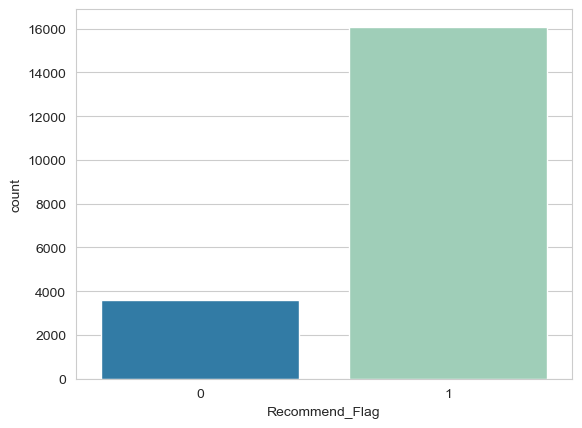

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Recommend_Flag',data=women_clothing, palette='YlGnBu_r')
plt.show()

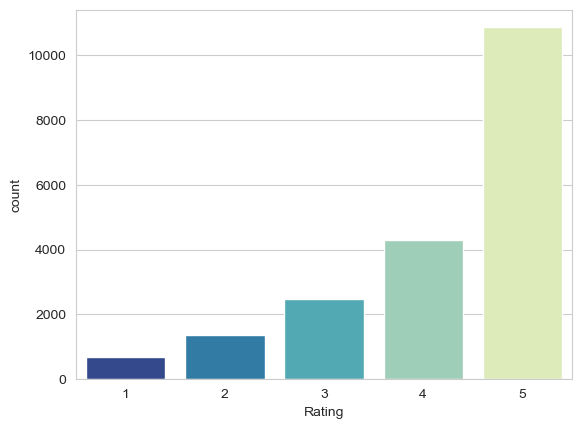

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=women_clothing, palette='YlGnBu_r')
plt.show()

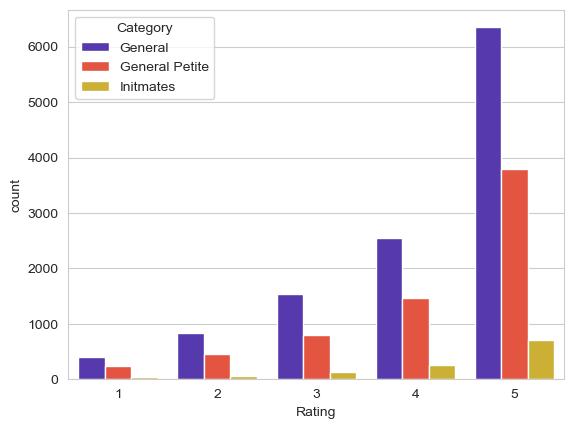

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Category',data= women_clothing,palette='CMRmap')
plt.show()

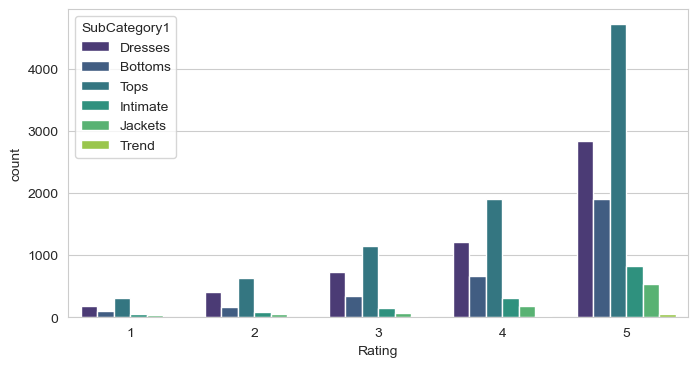

In [24]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='SubCategory1',data= women_clothing,palette='viridis')
plt.show()

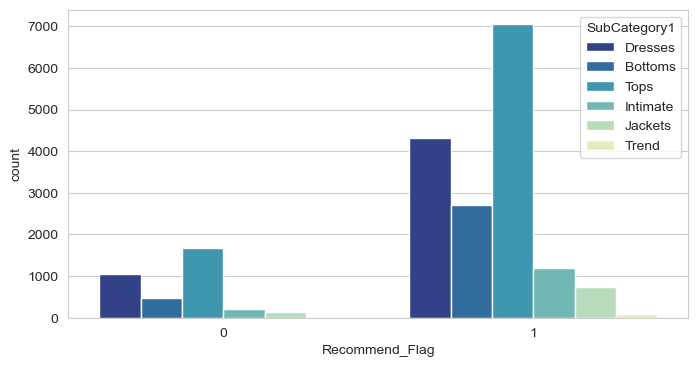

In [25]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Recommend_Flag',hue='SubCategory1',data=women_clothing,palette='YlGnBu_r')
plt.show()

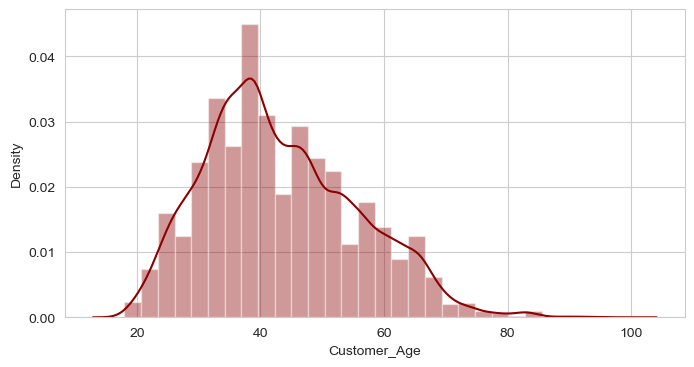

In [26]:
plt.figure(figsize=(8,4))
sns.distplot(women_clothing['Customer_Age'],color='darkred',bins=30)
plt.show()

# ANALYSIS ON REVIEW TEXT

In [27]:
# count sentence in each review
df['Review_Text'] = df['Review_Text'].astype(str)
df['count_sent']=df['Review_Text'].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment
df['count_word']=df['Review_Text'].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df['Review_Text'].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df['Review_Text'].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df['Review_Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df['Review_Text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["Review_Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Review_Text'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
   'noun' : ['NN','NNS','NNP','NNPS'],
  'pron' : ['PRP','PRP$','WP','WP$'],
 'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
 'adj' :  ['JJ','JJR','JJS'],
 'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'pron'))

# b. Perform Text Mining Tasks To Understand What Most Frequent Words Are Using For Positive Sentiment And Negative Sentiment. Create Word Clouds For The Positive & Negative Reviews Separately.

CALCULATING SENTIMENT ANALYSIS USING Textblob MODULE

In [28]:
df1 =women_clothing
df1.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [30]:
df1['Review_Text'] = df1['Review_Text'].astype(str)
df1['sentiment'] = df1["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [31]:
df1.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750


In [32]:
# Divide the data in to positive, negative and neutral sentiments and add a column sentiment_category
df1['sentiment_cat'] = np.where(df1.sentiment>0.1,'Positive', np.where(df1.sentiment<0.1, 'Negative', 'Nuetral'))

In [33]:
df1.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive


In [34]:
# total positive, negative and neutral sentiments in sentiment_cat using .value_counts()
df1.sentiment_cat.value_counts()

Positive    16191
Negative     3450
Nuetral        21
Name: sentiment_cat, dtype: int64

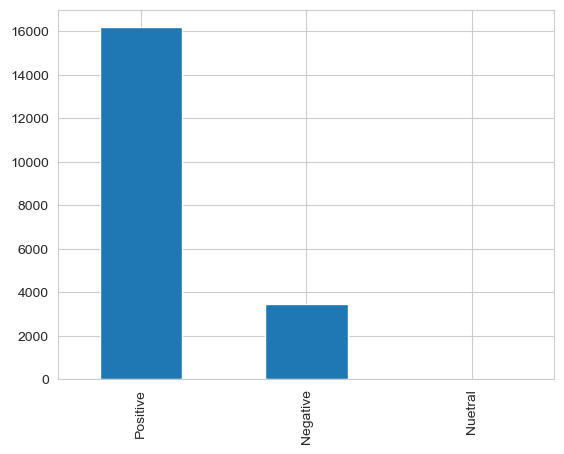

In [35]:
df1.sentiment_cat.value_counts().plot(kind='bar')
plt.show()

In [36]:
df1.Rating.value_counts() 

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [37]:
pd.crosstab(df1.sentiment_cat, df1.Rating)

Rating,1,2,3,4,5
sentiment_cat,,,,,
Negative,360,608,772,777,933
Nuetral,2,4,6,4,5
Positive,329,748,1686,3508,9920


# Divide The Data Into Three Groups On The Basis Of Sentiments Like Positive, Negative And Neutral

In [38]:
df2_neg = df1[(df1.sentiment_cat=='Negative')]
df3_pos = df1[(df1.sentiment_cat=='Positive')]
df4_neu = df1[(df1.sentiment_cat=='Neutral')]

# Split The Data Into Train & Test Where y Variable Is Rating

In [39]:
## X-variable is Review_text and y-variable is Rating
# define X and y
X = df1.Review_Text
y = df1.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


# Split The Data Into Train & Test For Positive Sentiments And Negative Sentiments

In [40]:
# create a new DataFrame that only contains the 5 Rating and 1-Rating reviews
#women_clothing = women_clothing[(women_clothing.Rating==5) | (women_clothing.Rating==1)]

# define X and y
X2 = df3_pos.Review_Text
y2 = df3_pos.Rating

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(12143,)
(4048,)
(12143,)
(4048,)


In [41]:
# define X and y
X1 = df2_neg.Review_Text
y1 = df2_neg.Rating

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(2587,)
(863,)
(2587,)
(863,)


Creating user defined functions for clean the text and pre-process the data

In [42]:
#Abbrevations and Words correction
def clean_text(Review_Text):
    Review_Text = Review_Text.lower()
    Review_Text = Review_Text.strip()
    Review_Text = re.sub(r' +', ' ', Review_Text)
    Review_Text = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Review_Text)
    Review_Text = Review_Text.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return(Review_Text)

In [43]:
sw = list(set(nltk.corpus.stopwords.words('english')))

In [44]:
stop = list(set(sw + ['the', 'me', 'how', 'what']))
print(stop)

['then', 'through', 'i', 'and', 'can', 'they', "mustn't", 'not', 'why', 'your', 'there', 'some', 'y', 'does', 'needn', 'nor', 're', 'ain', 'any', 'shan', "isn't", 'very', 'this', 'herself', 'those', 'm', 'haven', 'couldn', 'in', 'having', 'during', 'but', 'the', 'doing', 'if', "aren't", "won't", 'which', 'as', "haven't", "needn't", 'he', 'down', 'off', "mightn't", 'an', 'hers', 'don', 'we', 'him', "shan't", 'below', 'himself', "should've", 'once', 'theirs', 'under', 'been', 'didn', 'ours', 'no', 'to', "couldn't", 'only', 'her', 've', 'am', "hasn't", 'was', 'wouldn', 'out', 'wasn', "wasn't", 'his', 'their', 'being', 'where', 'hadn', 'our', 'd', 'when', 'same', "shouldn't", "hadn't", 'over', 'aren', "didn't", 'were', 'too', 'had', "you'll", 'should', 'most', 'shouldn', 'both', 'won', 'who', 'mightn', "doesn't", 'ourselves', 'have', 'each', 'mustn', 's', 'before', 'again', 'it', 'whom', 'them', 'its', "weren't", 'isn', 'hasn', 'own', 'such', 'yours', 'has', 'just', "you're", 'until', 'whi

In [45]:
import string
def pre_process(Review_Text):
    Review_Text = Review_Text.str.replace('/','') 
    Review_Text = Review_Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    Review_Text = Review_Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return(Review_Text)

In [46]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [47]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

CLean the text and pre-process the data for positive sentiments

In [48]:
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [49]:
X2_train=pre_process(X2_train)
X2_test=pre_process(X2_test)

In [50]:
X2_train

13262    top cute little cropped light sweater tank opi...
7445     dress beautiful fit hourglass figure perfectly...
15933    know supposed look oversized oversized poncho ...
20892    bought unique beauty size fit superb without c...
8528     reminds fabric soft look like picture im order...
                               ...                        
23403    originally purchased dress petite lb bust peti...
7576     love blouse however upon every time wear new b...
17690    excited top arrived mail beautiful love materi...
359      im pretty solid brand went since thought top r...
19372    really excited skirt love color however tried ...
Name: Review_Text, Length: 12143, dtype: object

CLean the text and pre-process the data for negative sentiments

In [51]:
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [52]:
X1_train=pre_process(X1_train)
X1_test=pre_process(X1_test)

In [53]:
X1_train

15353    ridiculous im usually x ordered x inseam short...
19608    skirt big returned like well enough reorder qu...
6533     im tall lb wear size hyphen chino loose could ...
19388    basic ribbed white tank little character back ...
3779     fabric thin isnt see thin would kept full leng...
3998     great casual pant lot style major disappointme...
6630     tried store looking online material soft flexi...
1626     comfy flattering cool hot day slightly difficu...
8577     im weight usually wear small dress retailer al...
14588    wore tunic everyday vacation hawaii run little...
5228     dress zillion time cuter real life retroswingy...
371      tried day local store size x although wool did...
21155    ordered skirt size small received long also ho...
14602    loved pattern color dress material extremely h...
11224    take needle pull thread back visible see ongoi...
9655     cloth stone getting little shotty lately term ...
482      wish list long time sure whether purchase even.

# Vectorization (Count, Tfidf) for Positive Sentiments And Negative Sentiments

In [54]:
#Train
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [55]:
xtrain2_count

<12143x800 sparse matrix of type '<class 'numpy.int64'>'
	with 272307 stored elements in Compressed Sparse Row format>

In [56]:
#Train
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

# View The Document Term Metrics For Positive And Negative Sentiments 

In [57]:
dtm=xtrain2_count.toarray()

In [58]:
print(count_vect2.get_feature_names())

['able', 'absolutely', 'across', 'actually', 'add', 'added', 'addition', 'adorable', 'adore', 'ag', 'ago', 'agree', 'airy', 'aline', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amount', 'anighthing', 'ankle', 'another', 'anyone', 'anyway', 'appears', 'appropriate', 'area', 'arent', 'arm', 'armhole', 'around', 'arrived', 'athletic', 'attractive', 'available', 'average', 'away', 'awesome', 'b', 'baby', 'back', 'bad', 'bag', 'baggy', 'band', 'barely', 'based', 'basic', 'bc', 'beach', 'beading', 'beautiful', 'beautifully', 'believe', 'bell', 'belly', 'belt', 'best', 'better', 'big', 'bigger', 'bit', 'black', 'blazer', 'blouse', 'blue', 'bodice', 'body', 'boot', 'booty', 'bottom', 'bought', 'boxy', 'bra', 'brand', 'bright', 'broad', 'brown', 'build', 'bulky', 'bust', 'busty', 'butt', 'button', 'buy', 'buying', 'c', 'came', 'cami', 'camisole', 'cannot', 'cant', 'cardigan', 'care', 'case', 'casual', 'caught', 'chance', 'cheap', 'chest', 'chested', 'chic', 'chose', 

In [59]:
dtm1=pd.DataFrame(dtm, columns = count_vect2.get_feature_names())
dtm1

,able,absolutely,across,actually,add,added,addition,adorable,adore,ag,...,xsp,xx,year,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12141,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dtm1.apply(sum)

able              258
absolutely        481
across            168
actually          398
add               343
added              97
addition          113
adorable          332
adore              74
ag                 68
ago                73
agree             181
airy               85
aline              80
almost            353
along              92
already           190
also             1345
although          241
always            333
amazing           304
amount            130
anighthing        221
ankle             200
another           393
anyone             79
anyway            109
appears           107
appropriate       120
area              396
arent              79
arm               706
armhole           124
around            584
arrived           166
athletic          132
attractive         59
available         150
average            63
away              173
awesome           145
b                 230
baby              102
back             1545
bad               122
bag       

In [61]:
dtm4=xtrain1_count.toarray()

In [62]:
print(count_vect1.get_feature_names())

['able', 'absolutely', 'across', 'actually', 'add', 'added', 'addition', 'adorable', 'afraid', 'ago', 'agree', 'ala', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'anighthing', 'ankle', 'another', 'anyone', 'anyway', 'apart', 'appears', 'area', 'arent', 'arm', 'armhole', 'armpit', 'around', 'arrived', 'athletic', 'attached', 'available', 'average', 'away', 'awful', 'awkward', 'b', 'back', 'bad', 'badly', 'bag', 'baggy', 'band', 'barely', 'based', 'basic', 'bc', 'beautiful', 'beautifully', 'behind', 'belly', 'belt', 'better', 'big', 'bigger', 'billowy', 'bit', 'black', 'blouse', 'blue', 'bodice', 'body', 'boob', 'boot', 'boring', 'bother', 'bottom', 'bought', 'bow', 'boxy', 'bra', 'brand', 'breast', 'bright', 'brighter', 'bring', 'broad', 'brown', 'build', 'bulky', 'bust', 'busty', 'butt', 'button', 'buy', 'buying', 'c', 'came', 'cami', 'cannot', 'cant', 'cardigan', 'care', 'case', 'casual', 'chance', 'cheap', 'chest', 'classic', 'clean', 'clingy', 'close', 'cl

In [63]:
dtm5=pd.DataFrame(dtm4, columns = count_vect1.get_feature_names())
dtm5

,able,absolutely,across,actually,add,added,addition,adorable,afraid,ago,...,xl,xsmall,xx,year,yellow,yes,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
dtm5.apply(sum)

able                28
absolutely          53
across              57
actually            96
add                 44
added               18
addition            17
adorable            42
afraid              29
ago                 15
agree               51
ala                 18
almost             101
along               30
already             61
also               392
although            57
always              59
amazing             18
anighthing          40
ankle               41
another             98
anyone              20
anyway              16
apart               18
appears             31
area                84
arent               19
arm                289
armhole             40
armpit              22
around             156
arrived             62
athletic            23
attached            17
available           25
average             20
away                48
awful               44
awkward             53
b                   50
back               543
bad                135
badly      

# Word Frequencies For Positive And Negative Sentiments

In [65]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq

,freq
also,1345
arm,706
around,584
absolutely,481
actually,398
area,396
another,393
almost,353
add,343
always,333


In [66]:
word_freq_dictionary = dict(dtm1.apply(sum))

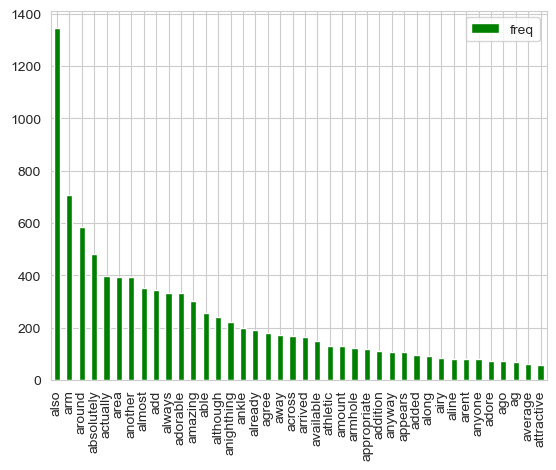

In [67]:
word_freq.plot(kind='bar', color='Green')
plt.show()

In [68]:
word_freq1 = pd.DataFrame(dtm5.apply(sum).head(40), columns=['freq'])
word_freq1.sort_values('freq', ascending=False, inplace=True)
word_freq1

,freq
also,392
arm,289
around,156
almost,101
another,98
actually,96
area,84
arrived,62
already,61
always,59


In [69]:
word_freq_dictionary1 = dict(dtm5.apply(sum))
word_freq_dictionary1

{'able': 28,
 'absolutely': 53,
 'across': 57,
 'actually': 96,
 'add': 44,
 'added': 18,
 'addition': 17,
 'adorable': 42,
 'afraid': 29,
 'ago': 15,
 'agree': 51,
 'ala': 18,
 'almost': 101,
 'along': 30,
 'already': 61,
 'also': 392,
 'although': 57,
 'always': 59,
 'amazing': 18,
 'anighthing': 40,
 'ankle': 41,
 'another': 98,
 'anyone': 20,
 'anyway': 16,
 'apart': 18,
 'appears': 31,
 'area': 84,
 'arent': 19,
 'arm': 289,
 'armhole': 40,
 'armpit': 22,
 'around': 156,
 'arrived': 62,
 'athletic': 23,
 'attached': 17,
 'available': 25,
 'average': 20,
 'away': 48,
 'awful': 44,
 'awkward': 53,
 'b': 50,
 'back': 543,
 'bad': 135,
 'badly': 15,
 'bag': 33,
 'baggy': 43,
 'band': 30,
 'barely': 34,
 'based': 44,
 'basic': 21,
 'bc': 17,
 'beautiful': 126,
 'beautifully': 16,
 'behind': 23,
 'belly': 16,
 'belt': 45,
 'better': 105,
 'big': 313,
 'bigger': 42,
 'billowy': 15,
 'bit': 301,
 'black': 287,
 'blouse': 109,
 'blue': 164,
 'bodice': 27,
 'body': 163,
 'boob': 21,
 'boot'

# Word Cloud For Positive And Negative Sentiments

In [70]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

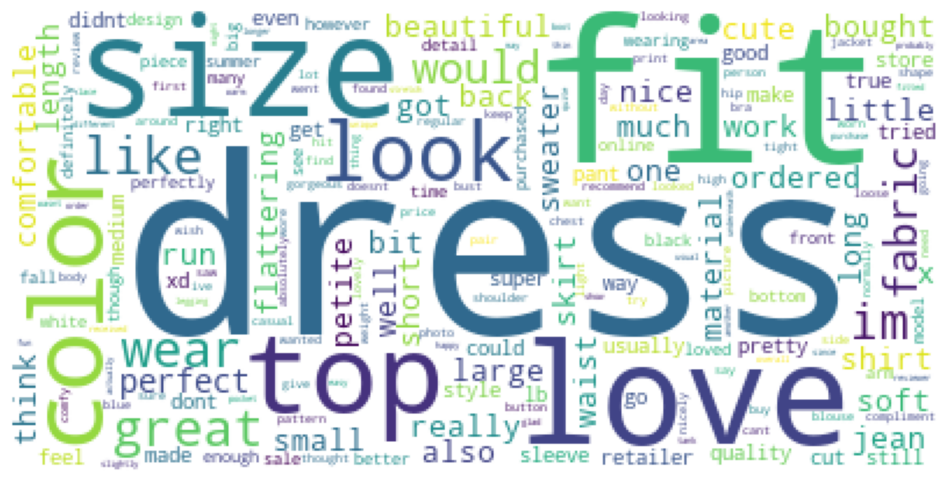

In [71]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

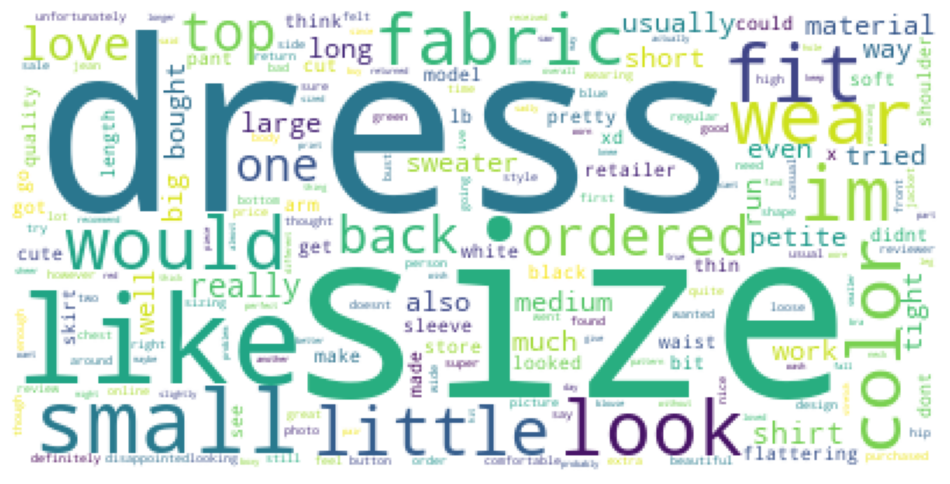

In [73]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud1 = WordCloud(background_color='white', stopwords=stop)
wordcloud1 = wordcloud1.generate_from_frequencies(word_freq_dictionary1)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()

# c. Understand Sentiment Among The Customers On The Different Categories, Sub Categories, Products By Location And Age Group

In [74]:
df1['age_group'] = pd.cut(x= df1.Customer_Age,bins=[20, 29, 39, 49,59 ,69,79,89 ,99])

In [75]:
df1

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment,sentiment_cat,age_group
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Negative,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,"(39, 49]"
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,Positive,"(39, 49]"
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,"(29, 39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0.552667,Positive,"(29, 39]"
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0.091667,Negative,"(39, 49]"
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,0.414286,Positive,"(29, 39]"
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,0.322222,Positive,"(20, 29]"


In [76]:
df1.groupby(['Location', 'age_group','Category','SubCategory1','SubCategory2',"sentiment_cat" ]).agg({'sentiment_cat': 'count'})

sentiment_cat
Location  age_group Category  SubCategory1 SubCategory2   sentiment_cat               
Bangalore (20, 29]  General   Bottoms      Blouses        Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0
                                           Casual bottoms Negative                   0
                                                          Nuetral                    0
...                                                                                ...
Mumbai    (89, 99]  Initmates Trend        Swim           Nuetral                    0
                                                          Positive                   0
                                           Trend          Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0

[34560 rows x 1 columns]

# d. Perform Predictive Analytics To Understand The Drivers Of Customers Who Are Recommending The Products.

Classification Model

Vectorization (count, tfidf) for both train & test

# Split the data in X and Y ( Recommend_Flag)

In [77]:
## X-variable is Review_text and y-variable is Rating
# define X and y
X4 = df1.Review_Text
y4 = df1.Recommend_Flag

# split the new DataFrame into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [78]:
X4_train = X4_train.apply(lambda x: clean_text(x))
X4_test = X4_test.apply(lambda x: clean_text(x))

In [79]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=100)
X_train_count4 = count_vect.fit_transform(X4_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=100)
X_train_tfidf4 = tfidf_vect.fit_transform(X4_train)

#Test
X_test_count4 = count_vect.transform(X4_test)
X_test_tfidf4 = tfidf_vect.transform(X4_test)

In [80]:
dtm_count=pd.DataFrame(X_train_count4.toarray(), columns=count_vect.get_feature_names())
dtm_tfidf=pd.DataFrame(X_train_tfidf4.toarray(), columns=tfidf_vect.get_feature_names())

Adding Features to a Document-Term Matrix

Dummy Creation

In [81]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [82]:
cat_vars = df1[['Category', 'SubCategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']]

# for c_feature in categorical_features
for c_feature in ['Category', 'SubCategory1', 'SubCategory2', 'sentiment_cat','Location', 'Channel']:
    cat_vars[c_feature] = cat_vars[c_feature].astype('category')
    cat_vars = create_dummies(cat_vars, c_feature)
 

cat_vars.head()

,Category_General Petite,Category_Initmates,SubCategory1_Dresses,SubCategory1_Intimate,SubCategory1_Jackets,SubCategory1_Tops,SubCategory1_Trend,SubCategory2_Casual bottoms,SubCategory2_Chemises,SubCategory2_Dresses,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Nuetral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [83]:
dtm_count

,a,all,also,am,an,and,are,as,at,back,...,was,wear,well,when,which,will,with,would,xs,you
0,1,0,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,2,0,0,4,0,0,2,0,...,1,0,0,1,0,1,2,0,0,0
3,4,0,0,0,0,7,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,5,0,0,1,0,...,2,0,0,2,0,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,4,0,0,0,0,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
14742,3,0,0,1,0,8,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
14743,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14744,1,0,0,0,0,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df2 =df1.loc[:, [ 'Review_Text', 'Customer_Age', 'Rating', 'sentiment','Recommend_Flag']]
df2

,Review_Text,Customer_Age,Rating,sentiment,Recommend_Flag
2,I had such high hopes for this dress and reall...,60,3,0.073675,0
3,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1
4,This shirt is very flattering to all due to th...,47,5,0.512891,1
5,"I love tracy reese dresses, but this one is no...",49,2,0.178750,0
6,I aded this in my basket at hte last mintue to...,39,5,0.133750,1
...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,34,5,0.552667,1
23482,"It reminds me of maternity clothes. soft, stre...",48,3,0.091667,1
23483,"This fit well, but the top was very see throug...",31,3,0.414286,0
23484,I bought this dress for a wedding i have this ...,28,3,0.322222,1


In [85]:
data = pd.concat([ df2,cat_vars], axis =1)

In [86]:
data.head()

,Review_Text,Customer_Age,Rating,sentiment,Recommend_Flag,Category_General Petite,Category_Initmates,SubCategory1_Dresses,SubCategory1_Intimate,SubCategory1_Jackets,...,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,sentiment_cat_Nuetral,sentiment_cat_Positive,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web
2,I had such high hopes for this dress and reall...,60,3,0.073675,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",50,5,0.550000,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,This shirt is very flattering to all due to th...,47,5,0.512891,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,"I love tracy reese dresses, but this one is no...",49,2,0.178750,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
6,I aded this in my basket at hte last mintue to...,39,5,0.133750,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [87]:
#define X and y
feature_cols = [ 'Review_Text', 'Customer_Age', 'Rating', 'sentiment','Recommend_Flag',
                'Category_General Petite', 'Category_Initmates','SubCategory1_Dresses', 'SubCategory1_Intimate',
                'SubCategory1_Jackets','SubCategory1_Tops', 'SubCategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_cat_Nuetral', 'sentiment_cat_Positive', 'Location_Chennai',
       'Location_Gurgaon', 'Location_Mumbai', 'Channel_Web']
X = data[feature_cols]
y = data.Recommend_Flag

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [88]:
X_train.Review_Text

20666    Perhaps i have gotten too used to flowy shirts...
20719    I sized up to a medium from a small and was gl...
11510    I bought this sweater in the green and loved i...
22208    I didn't notice what some of the other reviews...
12234    I agree with some of the other reviewers; this...
                               ...                        
13097    This dress intrigued me a bit online, but not ...
20651    It just didn't work for me. i don't know if it...
6203     I've been looking for a great long, loose, ver...
14529    I bought the denim ch rocket high-rise crop la...
303      I wore this dress for the first time yesterday...
Name: Review_Text, Length: 14746, dtype: object

In [89]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 36)

In [90]:
print(vect.get_feature_names())

['_x000d_', 'arms', 'beautiful', 'better', 'big', 'bit', 'black', 'blue', 'body', 'bought', 'chest', 'color', 'colors', 'comfortable', 'cut', 'cute', 'definitely', 'design', 'did', 'didn', 'does', 'don', 'dress', 'fabric', 'fall', 'feel', 'fit', 'fits', 'flattering', 'going', 'good', 'got', 'great', 'high', 'jacket', 'jeans', 'just', 'large', 'lbs', 'length', 'like', 'little', 'long', 'look', 'looked', 'looking', 'looks', 'loose', 'love', 'loved', 'material', 'medium', 'model', 'nice', 'online', 'ordered', 'pants', 'perfect', 'perfectly', 'person', 'petite', 'pretty', 'price', 'purchased', 'quality', 'really', 'regular', 'retailer', 'right', 'runs', 'sale', 'shirt', 'short', 'size', 'skirt', 'sleeves', 'small', 'soft', 'store', 'style', 'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tried', 'true', 'true size', 'try', 'usually', 've', 'waist', 'way', 'wear', 'wearing', 'white', 'work', 'worn', 'xs']


In [91]:
# use CountVectorizer with Review_Text column only
vect = CountVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 36)

In [92]:
print(vect.get_feature_names())

['_x000d_', 'arms', 'beautiful', 'better', 'big', 'bit', 'black', 'blue', 'body', 'bought', 'chest', 'color', 'colors', 'comfortable', 'cut', 'cute', 'definitely', 'design', 'did', 'didn', 'does', 'don', 'dress', 'fabric', 'fall', 'feel', 'fit', 'fits', 'flattering', 'going', 'good', 'got', 'great', 'high', 'jacket', 'jeans', 'just', 'large', 'lbs', 'length', 'like', 'little', 'long', 'look', 'looked', 'looking', 'looks', 'loose', 'love', 'loved', 'material', 'medium', 'model', 'nice', 'online', 'ordered', 'pants', 'perfect', 'perfectly', 'person', 'petite', 'pretty', 'price', 'purchased', 'quality', 'really', 'regular', 'retailer', 'right', 'runs', 'sale', 'shirt', 'short', 'size', 'skirt', 'sleeves', 'small', 'soft', 'store', 'style', 'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tried', 'true', 'true size', 'try', 'usually', 've', 'waist', 'way', 'wear', 'wearing', 'white', 'work', 'worn', 'xs']


In [93]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review_Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review_Text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(4916, 136)

In [94]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8403173311635476


In [95]:
print(dir(logreg))

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


In [96]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg.predict(X_train_dtm)
y_pred = logreg.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [97]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.63893376 0.86111934]

Recall :  [0.29658793 0.96299363]

F-Score : [0.40512164 0.90921171]

Accuracy :  0.8424657534246576


In [98]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.63945578 0.86011173]

Recall :  [0.31057269 0.96032934]

F-Score : [0.41808747 0.90746198]

Accuracy :  0.8403173311635476


In [99]:
#Saving model
import pickle
Pkl_Filename = "Pickle_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [100]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1000000000.0)

In [101]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test_dtm, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test_dtm)  
Ypredict

Test score: 84.03 %


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [103]:
print(vect.get_feature_names())

['_x000d_', 'arms', 'beautiful', 'better', 'big', 'bit', 'black', 'blue', 'body', 'bought', 'chest', 'color', 'colors', 'comfortable', 'cut', 'cute', 'definitely', 'design', 'did', 'didn', 'does', 'don', 'dress', 'fabric', 'fall', 'feel', 'fit', 'fits', 'flattering', 'going', 'good', 'got', 'great', 'high', 'jacket', 'jeans', 'just', 'large', 'lbs', 'length', 'like', 'little', 'long', 'look', 'looked', 'looking', 'looks', 'loose', 'love', 'loved', 'material', 'medium', 'model', 'nice', 'online', 'ordered', 'pants', 'perfect', 'perfectly', 'person', 'petite', 'pretty', 'price', 'purchased', 'quality', 'really', 'regular', 'retailer', 'right', 'runs', 'sale', 'shirt', 'short', 'size', 'skirt', 'sleeves', 'small', 'soft', 'store', 'style', 'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tried', 'true', 'true size', 'try', 'usually', 've', 'waist', 'way', 'wear', 'wearing', 'white', 'work', 'worn', 'xs']


So, Above we made one logistic model where Y variable is recommend_flag and X variable is review_text. The model gives accuracy of 84% in train and test. The difference between train and test accuracy is less so, we can say the model is good to use. The main key drivers who are responsible for recommending the product are as above.

In [104]:
#define X and y
feature_cols = [ 'Review_Text', 'Customer_Age', 'sentiment','Recommend_Flag',
                'Category_General Petite', 'Category_Initmates','SubCategory1_Dresses', 'SubCategory1_Intimate',
                'SubCategory1_Jackets','SubCategory1_Tops', 'SubCategory1_Trend',
       'SubCategory2_Casual bottoms', 'SubCategory2_Chemises',
       'SubCategory2_Dresses', 'SubCategory2_Fine gauge',
       'SubCategory2_Intimates', 'SubCategory2_Jackets', 'SubCategory2_Jeans',
       'SubCategory2_Knits', 'SubCategory2_Layering', 'SubCategory2_Legwear',
       'SubCategory2_Lounge', 'SubCategory2_Outerwear', 'SubCategory2_Pants',
       'SubCategory2_Shorts', 'SubCategory2_Skirts', 'SubCategory2_Sleep',
       'SubCategory2_Sweaters', 'SubCategory2_Swim', 'SubCategory2_Trend',
       'sentiment_cat_Nuetral', 'sentiment_cat_Positive', 'Location_Chennai',
       'Location_Gurgaon', 'Location_Mumbai', 'Channel_Web']
X = data[feature_cols]
y = data.Rating

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
# use  TfidfVectorizer with Review_Text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=100, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(14746, 100)
(4916, 100)


(14746, 35)

In [106]:
print(vect.get_feature_names())

['_x000d_', 'arms', 'beautiful', 'better', 'big', 'bit', 'black', 'blue', 'body', 'bought', 'chest', 'color', 'colors', 'comfortable', 'cut', 'cute', 'definitely', 'design', 'did', 'didn', 'does', 'don', 'dress', 'fabric', 'fall', 'feel', 'fit', 'fits', 'flattering', 'going', 'good', 'got', 'great', 'high', 'jacket', 'jeans', 'just', 'large', 'lbs', 'length', 'like', 'little', 'long', 'look', 'looked', 'looking', 'looks', 'loose', 'love', 'loved', 'material', 'medium', 'model', 'nice', 'online', 'ordered', 'pants', 'perfect', 'perfectly', 'person', 'petite', 'pretty', 'price', 'purchased', 'quality', 'really', 'regular', 'retailer', 'right', 'runs', 'sale', 'shirt', 'short', 'size', 'skirt', 'sleeves', 'small', 'soft', 'store', 'style', 'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tried', 'true', 'true size', 'try', 'usually', 've', 'waist', 'way', 'wear', 'wearing', 'white', 'work', 'worn', 'xs']


In [107]:
# use logistic regression with text column only
logreg2 = LogisticRegression(C=1e9)
logreg2.fit(X_train_dtm, y_train)
y_pred_class = logreg2.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5819772172497966


In [108]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model3.fit(X_train_dtm,y_train)

KNeighborsClassifier(n_jobs=-1)

In [109]:
# Finding the score for validation

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,accuracy_score

tr_pred=logreg2.predict(X_train_dtm)
y_pred = logreg2.predict(X_test_dtm)


trprecision,trrecall,trfscore,trsupport=score(y_train,tr_pred)
tracc=accuracy_score(y_train,tr_pred)
precision,recall,fscore,support=score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [110]:
# For Training

print('Precision : ',trprecision)
print('\nRecall : ',trrecall)
print('\nF-Score :',trfscore)
print('\nAccuracy : ',tracc)

Precision :  [0.3627907  0.31186441 0.37956204 0.42957253 0.65864449]

Recall :  [0.14471243 0.09397344 0.30918919 0.18948995 0.9141594 ]

F-Score : [0.20689655 0.144427   0.34078046 0.26297726 0.7656467 ]

Accuracy :  0.5967041909670419


In [111]:
# For Testing

print('Precision : ',precision)
print('\nRecall : ',recall)
print('\nF-Score :',fscore)
print('\nAccuracy : ',acc)

Precision :  [0.14925373 0.38235294 0.34874759 0.390625   0.64973545]

Recall :  [0.06578947 0.1023622  0.29478827 0.16603416 0.90460405]

F-Score : [0.0913242  0.16149068 0.31950574 0.23302264 0.75627406]

Accuracy :  0.5819772172497966


Above model is useful where X variable is Review_-text and Y variable is Rating.

In [112]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [113]:
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_dtm, y_train, X_test_dtm, y_test)
print("NB  for L1, TFIDF Vectors: ", accuracy_L1)

NB  for L1, TFIDF Vectors:  0.5545158665581774


In [114]:
accuracy_L1 = train_model(LogisticRegression(), X_train_dtm, y_train, X_test_dtm, y_test)
print("LR  for L1, tfidf Vectors: ", accuracy_L1)

LR  for L1, tfidf Vectors:  0.5827908868999186


In [115]:
accuracy_L1 = train_model(svm.LinearSVC(), X_train_dtm, y_train, X_test_dtm, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)


SVC  for L1, Count Vectors:  0.5756712774613507


Hence from above logistic regression gives best result.save the model as pickle object.

In [116]:
print(vect.get_feature_names())

['_x000d_', 'arms', 'beautiful', 'better', 'big', 'bit', 'black', 'blue', 'body', 'bought', 'chest', 'color', 'colors', 'comfortable', 'cut', 'cute', 'definitely', 'design', 'did', 'didn', 'does', 'don', 'dress', 'fabric', 'fall', 'feel', 'fit', 'fits', 'flattering', 'going', 'good', 'got', 'great', 'high', 'jacket', 'jeans', 'just', 'large', 'lbs', 'length', 'like', 'little', 'long', 'look', 'looked', 'looking', 'looks', 'loose', 'love', 'loved', 'material', 'medium', 'model', 'nice', 'online', 'ordered', 'pants', 'perfect', 'perfectly', 'person', 'petite', 'pretty', 'price', 'purchased', 'quality', 'really', 'regular', 'retailer', 'right', 'runs', 'sale', 'shirt', 'short', 'size', 'skirt', 'sleeves', 'small', 'soft', 'store', 'style', 'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tried', 'true', 'true size', 'try', 'usually', 've', 'waist', 'way', 'wear', 'wearing', 'white', 'work', 'worn', 'xs']


Above are main key drivers of customers who are recommending the products.

# e. Create Topics And Understand Themes BehindThe Topics By Performing TOPIC MINING

Topic Modeling using gensim

In [117]:
# Importing Gensim
import gensim
from gensim import corpora

In [118]:
X_train_tokens = [doc.split() for doc in X_train]  

In [119]:
X_train_tokens

[['Review_Text'],
 ['Customer_Age'],
 ['sentiment'],
 ['Recommend_Flag'],
 ['Category_General', 'Petite'],
 ['Category_Initmates'],
 ['SubCategory1_Dresses'],
 ['SubCategory1_Intimate'],
 ['SubCategory1_Jackets'],
 ['SubCategory1_Tops'],
 ['SubCategory1_Trend'],
 ['SubCategory2_Casual', 'bottoms'],
 ['SubCategory2_Chemises'],
 ['SubCategory2_Dresses'],
 ['SubCategory2_Fine', 'gauge'],
 ['SubCategory2_Intimates'],
 ['SubCategory2_Jackets'],
 ['SubCategory2_Jeans'],
 ['SubCategory2_Knits'],
 ['SubCategory2_Layering'],
 ['SubCategory2_Legwear'],
 ['SubCategory2_Lounge'],
 ['SubCategory2_Outerwear'],
 ['SubCategory2_Pants'],
 ['SubCategory2_Shorts'],
 ['SubCategory2_Skirts'],
 ['SubCategory2_Sleep'],
 ['SubCategory2_Sweaters'],
 ['SubCategory2_Swim'],
 ['SubCategory2_Trend'],
 ['sentiment_cat_Nuetral'],
 ['sentiment_cat_Positive'],
 ['Location_Chennai'],
 ['Location_Gurgaon'],
 ['Location_Mumbai'],
 ['Channel_Web']]

In [120]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary(39 unique tokens: ['Review_Text', 'Customer_Age', 'sentiment', 'Recommend_Flag', 'Category_General']...)


In [121]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [122]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [123]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary,passes=1)

In [124]:
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.070*"Customer_Age" + 0.070*"SubCategory2_Lounge" + 0.070*"SubCategory2_Sleep" + 0.070*"Recommend_Flag" + 0.070*"SubCategory1_Intimate" + 0.070*"Location_Chennai" + 0.070*"sentiment_cat_Positive" + 0.070*"SubCategory2_Skirts" + 0.070*"SubCategory1_Jackets" + 0.012*"SubCategory2_Chemises" + 0.012*"sentiment" + 0.012*"SubCategory2_Dresses" + 0.012*"SubCategory2_Shorts" + 0.012*"SubCategory2_Layering" + 0.012*"Location_Gurgaon" + 0.012*"SubCategory1_Dresses" + 0.012*"Channel_Web" + 0.012*"SubCategory2_Jeans" + 0.012*"SubCategory2_Knits" + 0.012*"SubCategory1_Trend"'), (1, '0.071*"Category_General" + 0.071*"Petite" + 0.070*"SubCategory2_Outerwear" + 0.070*"SubCategory2_Trend" + 0.070*"SubCategory2_Swim" + 0.070*"SubCategory2_Jackets" + 0.070*"SubCategory2_Pants" + 0.070*"Channel_Web" + 0.070*"SubCategory1_Tops" + 0.012*"SubCategory1_Jackets" + 0.012*"Customer_Age" + 0.012*"Location_Chennai" + 0.012*"Recommend_Flag" + 0.012*"sentiment_cat_Positive" + 0.012*"SubCategory2_Chemises" + 0

In [125]:
topics = ldamodel.show_topics(formatted=False, num_words=30)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,30))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 30 words:
Customer_Age SubCategory2_Lounge SubCategory2_Sleep Recommend_Flag SubCategory1_Intimate Location_Chennai sentiment_cat_Positive SubCategory2_Skirts SubCategory1_Jackets SubCategory2_Chemises sentiment SubCategory2_Dresses SubCategory2_Shorts SubCategory2_Layering Location_Gurgaon SubCategory1_Dresses Channel_Web SubCategory2_Jeans SubCategory2_Knits SubCategory1_Trend SubCategory2_Intimates SubCategory1_Tops SubCategory2_Pants sentiment_cat_Nuetral SubCategory2_Trend SubCategory2_Outerwear Review_Text Category_Initmates SubCategory2_Jackets Location_Mumbai

Topic 2, top 30 words:
Category_General Petite SubCategory2_Outerwear SubCategory2_Trend SubCategory2_Swim SubCategory2_Jackets SubCategory2_Pants Channel_Web SubCategory1_Tops SubCategory1_Jackets Customer_Age Location_Chennai Recommend_Flag sentiment_cat_Positive SubCategory2_Chemises sentiment_cat_Nuetral SubCategory2_Intimates SubCategory2_Knits SubCategory2_Layering SubCategory1_Trend sentiment SubCateg

# Topic Modeling using sklearn.decomposition

In [126]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X_train_dtm)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [127]:
# view the topic models
n_top_words = 40
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['in than material really so an much was dress jeans which fits but perfect im this even cute you look one its also when beautiful medium has color well ordered out down flattering comfortable them back large because little would',
 'if not flattering too fits look has which had with is so nice you long back im dress than its little jeans just much and that for because bit but was beautiful quality medium it ordered well to even down',
 'on the top dress length so waist more petite looks its fits you much comfortable im beautiful even it when large than colors look pretty which perfect for well would small am jeans has and of but me is was',
 'my bit they look but has color that for medium which even love would fits if beautiful large its dress nice one had perfect and bought it these down at comfortable im to can small fabric flattering too so when',
 'dress are nice will fabric these got look because back also has which beautiful for ordered jeans bit even im fits with medium one its